In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
sns.set_style("white")
# permet d'afficher les graphiques dans un notebook
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Import Data

In [2]:
ETF_universe=pd.read_csv('C:/Users/petul/OneDrive/Bureau/Master 2/Semestre 2/Applied Data Science 1/ETF/ETF_Universe.csv',sep = ';',index_col='date')
ETF_universe

ETF_1       ETF_2       ETF_3       ETF_4       ETF_5  \
date                                                                     
04/01/2021  100.000000  100.000000  100.000000  100.000000  100.000000   
05/01/2021  100.664447  100.083922   99.252395  102.032069  100.041029   
06/01/2021   98.549788   99.519065   98.364484  107.519936   99.698544   
07/01/2021   99.735901   98.684154   99.717292  114.954919  101.233032   
08/01/2021  101.813931  101.323378   99.264960  116.151961  103.332426   
...                ...         ...         ...         ...         ...   
23/03/2023   74.868592  113.657686  121.902518   68.095661  106.478710   
24/03/2023   75.202682  111.067955  119.537197   67.401513  106.473096   
27/03/2023   74.952348  111.341238  121.790482   67.562456  106.564655   
28/03/2023   74.244973  109.850017  122.177896   67.566298  106.665717   
29/03/2023   75.220880  112.782966  122.357992   68.850003  107.810212   

                 ETF_6       ETF_7       ETF_8       ETF_9      ETF_10  ...  \
date                                                                    ...   
04/01/2021  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
05/01/2021  100.269482   99.779466  101.721018   99.633393  100.025174  ...   
06/01/2021   99.834420  101.532557  101.561550   99.624949  100.121489  ...   
07/01/2021  101.019559  103.712486  104.576537   99.222455  100.238511  ...   
08/01/2021  103.120770  104.025163  105.525583   95.806184  100.473455  ...   
...                ...         ...         ...         ...         ...  ...   
23/03/2023   86.832247   90.525182  117.126901   82.487299   99.325409  ...   
24/03/2023   86.952706   90.170160  115.425105   83.089632   99.410211  ...   
27/03/2023   86.510194   90.180661  114.424591   83.051635   98.971767  ...   
28/03/2023   87.146849   90.373417  113.297791   84.563097   98.612283  ...   
29/03/2023   87.045017   91.166796  116.201824   84.356221   98.769557  ...   

                ETF_92      ETF_93      ETF_94      ETF_95      ETF_96  \
date                                                                     
04/01/2021  100.000000  100.000000  100.000000  100.000000  100.000000   
05/01/2021   99.990476  100.840152  101.002981  100.739760   99.536130   
06/01/2021   99.972549  100.057308  102.128050  101.231133  101.309788   
07/01/2021   99.970309  101.206768  103.191639  102.864413  101.628140   
08/01/2021   99.974790  102.608099  103.597696  103.454080  102.263032   
...                ...         ...         ...         ...         ...   
23/03/2023   96.191100   97.192487  109.206061  106.271420  123.709405   
24/03/2023   96.368688   96.230280  108.603153  106.829062  121.535832   
27/03/2023   96.249923   96.112236  109.833182  107.029701  122.535942   
28/03/2023   96.126676   97.452443  110.583040  106.854142  122.641585   
29/03/2023   96.113791   97.798749  112.021290  108.403404  124.497194   

                ETF_97      ETF_98      ETF_99     ETF_100     ETF_101  
date                                                                    
04/01/2021  100.000000  100.000000  100.000000  100.000000  100.000000  
05/01/2021   99.813980   99.603933  100.854623  100.202380  100.031821  
06/01/2021   99.944805  100.964540   99.444345  102.497743  100.158991  
07/01/2021  101.677728  101.444481  101.936676  102.922817  100.254745  
08/01/2021  103.375352  102.152742  103.242398  103.967763  100.326256  
...                ...         ...         ...         ...         ...  
23/03/2023  112.732806  116.224780  101.517271  136.156331  102.581525  
24/03/2023  112.591472  114.137272  101.818816  135.991859  102.208289  
27/03/2023  112.921116  115.208984  101.069376  136.940118  102.276907  
28/03/2023  113.302632  115.264899  100.570910  138.793038  102.132843  
29/03/2023  114.839521  116.923722  102.448725  141.634001  102.671261  

[583 rows x 101 columns]

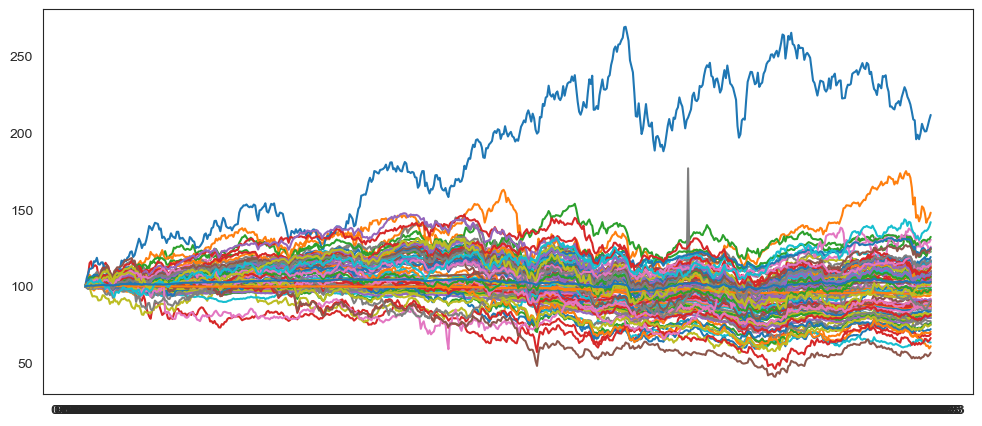

In [3]:
# Vizualisation of ETF_universe
plt.figure(figsize=(12,5))
plt.plot(ETF_universe)
plt.show()

In [4]:
macro_factors=pd.read_csv('C:/Users/petul/OneDrive/Bureau/Master 2/Semestre 2/Applied Data Science 1/ETF/Macro_Factors.csv',sep = ';',index_col='date')
macro_factors

US S&P 500  EU Stoxx 600  Japan Nikkei 225  MSCI EM USD     US HY  \
date                                                                            
02/01/2006     1826.29        449.37          20357.98      239.826  129.2152   
03/01/2006     1856.29        452.05          20357.98      244.626  129.4319   
04/01/2006     1863.37        456.54          20674.01      249.317  129.6151   
05/01/2006     1863.41        454.95          20754.66      250.318  129.7995   
06/01/2006     1881.25        457.93          20758.25      252.609  129.9412   
...                ...           ...               ...          ...       ...   
24/03/2023     7404.90       1022.11          47076.54      495.640  301.4518   
27/03/2023     7417.09       1032.95          47234.21      491.570  301.6986   
28/03/2023     7405.55       1032.36          47305.34      495.010  301.1921   
29/03/2023     7510.99       1045.86          47931.69      499.940  303.0247   
30/03/2023     7554.62       1057.09          48201.91      502.980  304.6332   

               EU HY  BCOM Energy  BCOM Industrial Metals  BCOM Gold  \
date                                                                   
02/01/2006   99.9315     414.0502                134.3885    78.5000   
03/01/2006  100.0602     410.4813                135.2008    80.5575   
04/01/2006  100.3518     404.6232                137.3217    81.0264   
05/01/2006  100.5329     391.5917                136.7150    79.8464   
06/01/2006  100.6230     398.2335                137.5239    81.8736   
...              ...          ...                     ...        ...   
24/03/2023  197.5785      31.9028                157.8276   210.8200   
27/03/2023  197.8065      32.5105                158.9371   207.6393   
28/03/2023  198.0427      32.4988                159.9763   209.6299   
29/03/2023  198.4324      32.3383                159.8253   209.0085   
30/03/2023  199.1470      32.3836                159.0450   210.3987   

            Dollar Index  US 10Y Bond  Germany Bund 10Y  
date                                                     
02/01/2006      1060.210      622.131           715.768  
03/01/2006      1046.826      623.686           716.412  
04/01/2006      1035.497      624.466           720.281  
05/01/2006      1038.747      624.466           720.641  
06/01/2006      1032.567      623.295           721.506  
...                  ...          ...               ...  
24/03/2023      1210.312      969.057          1302.301  
27/03/2023      1208.977      958.155          1278.860  
28/03/2023      1203.988      954.861          1269.141  
29/03/2023      1206.116      953.817          1268.506  
30/03/2023      1199.391      954.264          1261.276  

[4499 rows x 12 columns]

In [5]:
# keep colomuns we want
macro_factors=macro_factors.iloc[3916:4499]
macro_factors

US S&P 500  EU Stoxx 600  Japan Nikkei 225  MSCI EM USD     US HY  \
date                                                                            
05/01/2021     6783.39        883.92          44882.19      638.034  318.1225   
06/01/2021     6822.20        896.00          44712.49      635.789  318.4568   
07/01/2021     6924.53        900.60          45430.03      639.180  318.7039   
08/01/2021     6963.18        906.52          46502.40      654.287  318.8697   
11/01/2021     6917.52        900.42          46502.40      652.386  318.4451   
...                ...           ...               ...          ...       ...   
24/03/2023     7404.90       1022.11          47076.54      495.640  301.4518   
27/03/2023     7417.09       1032.95          47234.21      491.570  301.6986   
28/03/2023     7405.55       1032.36          47305.34      495.010  301.1921   
29/03/2023     7510.99       1045.86          47931.69      499.940  303.0247   
30/03/2023     7554.62       1057.09          48201.91      502.980  304.6332   

               EU HY  BCOM Energy  BCOM Industrial Metals  BCOM Gold  \
date                                                                   
05/01/2021  207.4808      21.1276                137.4571   216.9749   
06/01/2021  207.6067      21.3284                138.1451   211.8903   
07/01/2021  207.7834      21.3946                139.5059   212.4454   
08/01/2021  207.9640      21.6744                137.6681   203.7637   
11/01/2021  208.0137      21.7616                134.5994   205.4681   
...              ...          ...                     ...        ...   
24/03/2023  197.5785      31.9028                157.8276   210.8200   
27/03/2023  197.8065      32.5105                158.9371   207.6393   
28/03/2023  198.0427      32.4988                159.9763   209.6299   
29/03/2023  198.4324      32.3383                159.8253   209.0085   
30/03/2023  199.1470      32.3836                159.0450   210.3987   

            Dollar Index  US 10Y Bond  Germany Bund 10Y  
date                                                     
05/01/2021      1043.137     1178.733          1788.087  
06/01/2021      1039.544     1171.182          1775.302  
07/01/2021      1043.476     1168.254          1778.542  
08/01/2021      1043.282     1164.786          1778.409  
11/01/2021      1053.374     1162.056          1773.696  
...                  ...          ...               ...  
24/03/2023      1210.312      969.057          1302.301  
27/03/2023      1208.977      958.155          1278.860  
28/03/2023      1203.988      954.861          1269.141  
29/03/2023      1206.116      953.817          1268.506  
30/03/2023      1199.391      954.264          1261.276  

[583 rows x 12 columns]

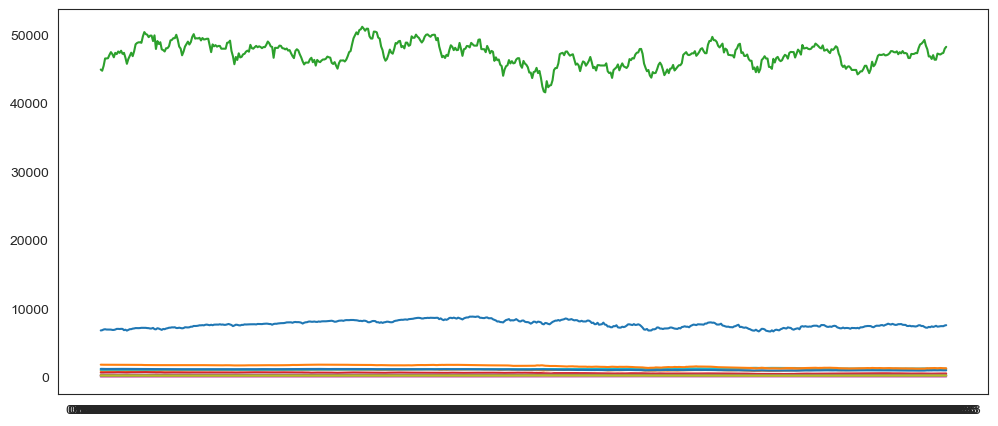

In [6]:
# Vizualisation of macro_factors
plt.figure(figsize=(12,5))
plt.plot(macro_factors)
plt.show()

In [21]:
mystery_allocation=pd.read_csv('C:/Users/petul/OneDrive/Bureau/Master 2/Semestre 2/Applied Data Science 1/ETF/Mystery_Allocation.csv',sep = ';', index_col='date')
mystery_allocation

Mystery_Allocation
date                          
04/01/2021          100.000000
05/01/2021          100.411114
06/01/2021          100.928422
07/01/2021          101.507654
08/01/2021          101.965763
...                        ...
23/03/2023           96.635446
24/03/2023           96.623805
27/03/2023           96.258588
28/03/2023           96.276506
29/03/2023           97.297423

[583 rows x 1 columns]

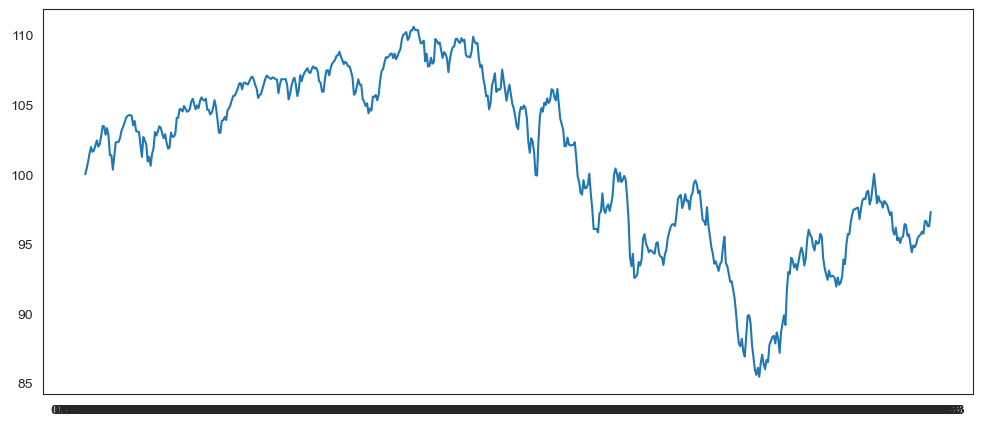

In [22]:
# vizualisation of mystery_allocation
plt.figure(figsize=(12,5))
plt.plot(ETF_mystery)
plt.show()

# returns

In [11]:
ETF_universeR=ETF_universe.pct_change().dropna()
ETF_universeR 

ETF_1     ETF_2     ETF_3     ETF_4     ETF_5     ETF_6  \
date                                                                     
05/01/2021  0.006644  0.000839 -0.007476  0.020321  0.000410  0.002695   
06/01/2021 -0.021007 -0.005644 -0.008946  0.053786 -0.003423 -0.004339   
07/01/2021  0.012036 -0.008389  0.013753  0.069150  0.015391  0.011871   
08/01/2021  0.020835  0.026744 -0.004536  0.010413  0.020738  0.020800   
11/01/2021 -0.005786 -0.006955 -0.011561 -0.037496  0.000100 -0.004797   
...              ...       ...       ...       ...       ...       ...   
23/03/2023  0.024771  0.021792 -0.004029  0.010516 -0.004631  0.007812   
24/03/2023  0.004462 -0.022785 -0.019403 -0.010194 -0.000053  0.001387   
27/03/2023 -0.003329  0.002461  0.018850  0.002388  0.000860 -0.005089   
28/03/2023 -0.009438 -0.013393  0.003181  0.000057  0.000948  0.007359   
29/03/2023  0.013144  0.026700  0.001474  0.018999  0.010730 -0.001169   

               ETF_7     ETF_8     ETF_9    ETF_10  ...    ETF_92    ETF_93  \
date                                                ...                       
05/01/2021 -0.002205  0.017210 -0.003666  0.000252  ... -0.000095  0.008402   
06/01/2021  0.017570 -0.001568 -0.000085  0.000963  ... -0.000179 -0.007763   
07/01/2021  0.021470  0.029686 -0.004040  0.001169  ... -0.000022  0.011488   
08/01/2021  0.003015  0.009075 -0.034430  0.002344  ...  0.000045  0.013846   
11/01/2021 -0.013355  0.005214 -0.027116 -0.002339  ... -0.000387 -0.015592   
...              ...       ...       ...       ...  ...       ...       ...   
23/03/2023 -0.000658  0.025367  0.024058  0.010507  ...  0.002528  0.002971   
24/03/2023 -0.003922 -0.014530  0.007302  0.000854  ...  0.001846 -0.009900   
27/03/2023  0.000116 -0.008668 -0.000457 -0.004410  ... -0.001232 -0.001227   
28/03/2023  0.002137 -0.009848  0.018199 -0.003632  ... -0.001280  0.013944   
29/03/2023  0.008779  0.025632 -0.002446  0.001595  ... -0.000134  0.003554   

              ETF_94    ETF_95    ETF_96    ETF_97    ETF_98    ETF_99  \
date                                                                     
05/01/2021  0.010030  0.007398 -0.004639 -0.001860 -0.003961  0.008546   
06/01/2021  0.011139  0.004878  0.017819  0.001311  0.013660 -0.013983   
07/01/2021  0.010414  0.016134  0.003142  0.017339  0.004754  0.025063   
08/01/2021  0.003935  0.005732  0.006247  0.016696  0.006982  0.012809   
11/01/2021 -0.015215 -0.006324 -0.006702  0.000000 -0.007481 -0.015468   
...              ...       ...       ...       ...       ...       ...   
23/03/2023  0.000313  0.003003  0.002727 -0.004237  0.001405  0.012897   
24/03/2023 -0.005521  0.005247 -0.017570 -0.001254 -0.017961  0.002970   
27/03/2023  0.011326  0.001878  0.008229  0.002928  0.009390 -0.007361   
28/03/2023  0.006827 -0.001640  0.000862  0.003379  0.000485 -0.004932   
29/03/2023  0.013006  0.014499  0.015130  0.013564  0.014391  0.018672   

             ETF_100   ETF_101  
date                            
05/01/2021  0.002024  0.000318  
06/01/2021  0.022907  0.001271  
07/01/2021  0.004147  0.000956  
08/01/2021  0.010153  0.000713  
11/01/2021 -0.014067 -0.000460  
...              ...       ...  
23/03/2023  0.007821 -0.001441  
24/03/2023 -0.001208 -0.003638  
27/03/2023  0.006973  0.000671  
28/03/2023  0.013531 -0.001409  
29/03/2023  0.020469  0.005272  

[582 rows x 101 columns]

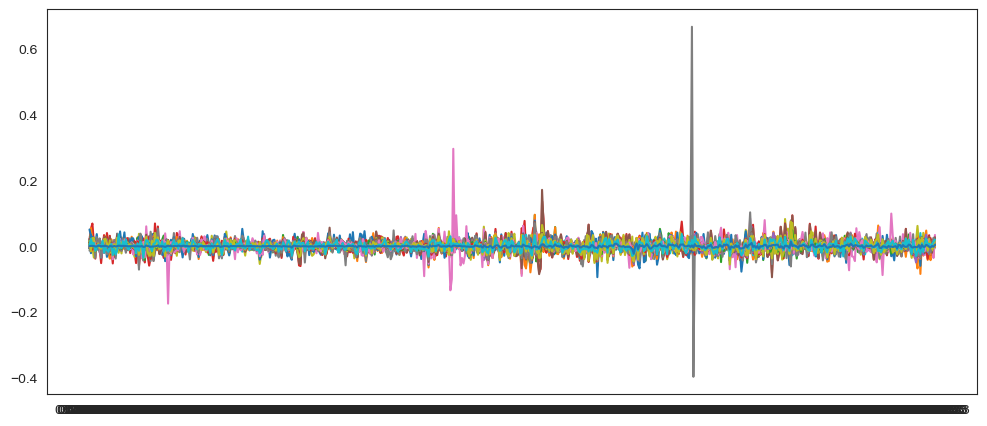

In [14]:
# vizualisation of ETF_universe Returns 
plt.figure(figsize=(12,5))
plt.plot(ETF_universeR )
plt.show()

In [15]:
macro_factorsR= macro_factors.pct_change().dropna()
macro_factorsR

US S&P 500  EU Stoxx 600  Japan Nikkei 225  MSCI EM USD     US HY  \
date                                                                            
06/01/2021    0.005721      0.013666         -0.003781    -0.003519  0.001051   
07/01/2021    0.015000      0.005134          0.016048     0.005334  0.000776   
08/01/2021    0.005582      0.006573          0.023605     0.023635  0.000520   
11/01/2021   -0.006557     -0.006729          0.000000    -0.002905 -0.001332   
12/01/2021    0.000418      0.000578          0.000900     0.002946 -0.001242   
...                ...           ...               ...          ...       ...   
24/03/2023    0.005643     -0.013303         -0.001253    -0.005458 -0.004300   
27/03/2023    0.001646      0.010606          0.003349    -0.008212  0.000819   
28/03/2023   -0.001556     -0.000571          0.001506     0.006998 -0.001679   
29/03/2023    0.014238      0.013077          0.013241     0.009959  0.006084   
30/03/2023    0.005809      0.010738          0.005638     0.006081  0.005308   

               EU HY  BCOM Energy  BCOM Industrial Metals  BCOM Gold  \
date                                                                   
06/01/2021  0.000607     0.009504                0.005005  -0.023434   
07/01/2021  0.000851     0.003104                0.009851   0.002620   
08/01/2021  0.000869     0.013078               -0.013174  -0.040866   
11/01/2021  0.000239     0.004023               -0.022291   0.008365   
12/01/2021 -0.000777     0.012991                0.012157  -0.003584   
...              ...          ...                     ...        ...   
24/03/2023 -0.001710    -0.001315                0.002336  -0.005762   
27/03/2023  0.001154     0.019048                0.007030  -0.015087   
28/03/2023  0.001194    -0.000360                0.006538   0.009587   
29/03/2023  0.001968    -0.004939               -0.000944  -0.002964   
30/03/2023  0.003601     0.001401               -0.004882   0.006651   

            Dollar Index  US 10Y Bond  Germany Bund 10Y  
date                                                     
06/01/2021     -0.003444    -0.006406         -0.007150  
07/01/2021      0.003782    -0.002500          0.001825  
08/01/2021     -0.000186    -0.002969         -0.000075  
11/01/2021      0.009673    -0.002344         -0.002650  
12/01/2021     -0.001435    -0.000312         -0.006050  
...                  ...          ...               ...  
24/03/2023      0.009006     0.001250          0.021050  
27/03/2023     -0.001103    -0.011250         -0.018000  
28/03/2023     -0.004127    -0.003438         -0.007600  
29/03/2023      0.001767    -0.001093         -0.000500  
30/03/2023     -0.005576     0.000469         -0.005700  

[582 rows x 12 columns]

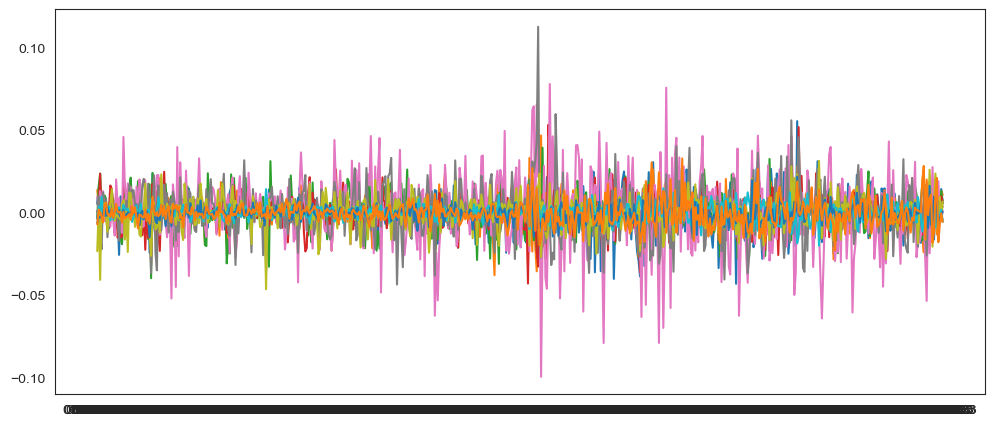

In [16]:
# vizualisation of macro_factors Returns 
plt.figure(figsize=(12,5))
plt.plot(macro_factorsR)
plt.show()

In [23]:
mystery_allocationR=ETF_mystery.pct_change().dropna()
mystery_allocationR

Mystery_Allocation
date                          
05/01/2021            0.004111
06/01/2021            0.005152
07/01/2021            0.005739
08/01/2021            0.004513
11/01/2021           -0.003387
...                        ...
23/03/2023            0.009507
24/03/2023           -0.000120
27/03/2023           -0.003780
28/03/2023            0.000186
29/03/2023            0.010604

[582 rows x 1 columns]

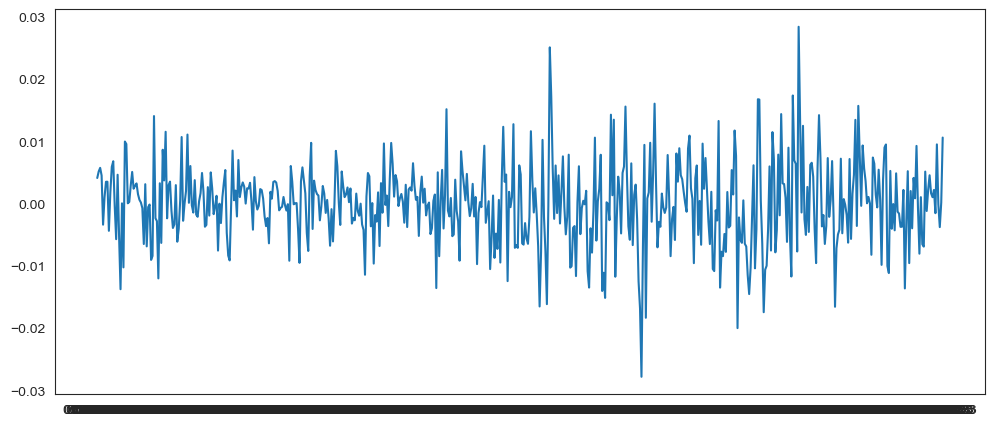

In [24]:
# vizualisation of mystery_allocation Returns
plt.figure(figsize=(12,5))
plt.plot(mystery_allocationR)
plt.show()

In [27]:
# merge our data: ETF_universe and Allocation mystery
ETF_mystery=pd.merge(ETF_universeR, mystery_allocationR, on='date', how='inner')
ETF_mystery

ETF_1     ETF_2     ETF_3     ETF_4     ETF_5     ETF_6  \
date                                                                     
05/01/2021  0.006644  0.000839 -0.007476  0.020321  0.000410  0.002695   
06/01/2021 -0.021007 -0.005644 -0.008946  0.053786 -0.003423 -0.004339   
07/01/2021  0.012036 -0.008389  0.013753  0.069150  0.015391  0.011871   
08/01/2021  0.020835  0.026744 -0.004536  0.010413  0.020738  0.020800   
11/01/2021 -0.005786 -0.006955 -0.011561 -0.037496  0.000100 -0.004797   
...              ...       ...       ...       ...       ...       ...   
23/03/2023  0.024771  0.021792 -0.004029  0.010516 -0.004631  0.007812   
24/03/2023  0.004462 -0.022785 -0.019403 -0.010194 -0.000053  0.001387   
27/03/2023 -0.003329  0.002461  0.018850  0.002388  0.000860 -0.005089   
28/03/2023 -0.009438 -0.013393  0.003181  0.000057  0.000948  0.007359   
29/03/2023  0.013144  0.026700  0.001474  0.018999  0.010730 -0.001169   

               ETF_7     ETF_8     ETF_9    ETF_10  ...    ETF_93    ETF_94  \
date                                                ...                       
05/01/2021 -0.002205  0.017210 -0.003666  0.000252  ...  0.008402  0.010030   
06/01/2021  0.017570 -0.001568 -0.000085  0.000963  ... -0.007763  0.011139   
07/01/2021  0.021470  0.029686 -0.004040  0.001169  ...  0.011488  0.010414   
08/01/2021  0.003015  0.009075 -0.034430  0.002344  ...  0.013846  0.003935   
11/01/2021 -0.013355  0.005214 -0.027116 -0.002339  ... -0.015592 -0.015215   
...              ...       ...       ...       ...  ...       ...       ...   
23/03/2023 -0.000658  0.025367  0.024058  0.010507  ...  0.002971  0.000313   
24/03/2023 -0.003922 -0.014530  0.007302  0.000854  ... -0.009900 -0.005521   
27/03/2023  0.000116 -0.008668 -0.000457 -0.004410  ... -0.001227  0.011326   
28/03/2023  0.002137 -0.009848  0.018199 -0.003632  ...  0.013944  0.006827   
29/03/2023  0.008779  0.025632 -0.002446  0.001595  ...  0.003554  0.013006   

              ETF_95    ETF_96    ETF_97    ETF_98    ETF_99   ETF_100  \
date                                                                     
05/01/2021  0.007398 -0.004639 -0.001860 -0.003961  0.008546  0.002024   
06/01/2021  0.004878  0.017819  0.001311  0.013660 -0.013983  0.022907   
07/01/2021  0.016134  0.003142  0.017339  0.004754  0.025063  0.004147   
08/01/2021  0.005732  0.006247  0.016696  0.006982  0.012809  0.010153   
11/01/2021 -0.006324 -0.006702  0.000000 -0.007481 -0.015468 -0.014067   
...              ...       ...       ...       ...       ...       ...   
23/03/2023  0.003003  0.002727 -0.004237  0.001405  0.012897  0.007821   
24/03/2023  0.005247 -0.017570 -0.001254 -0.017961  0.002970 -0.001208   
27/03/2023  0.001878  0.008229  0.002928  0.009390 -0.007361  0.006973   
28/03/2023 -0.001640  0.000862  0.003379  0.000485 -0.004932  0.013531   
29/03/2023  0.014499  0.015130  0.013564  0.014391  0.018672  0.020469   

             ETF_101  Mystery_Allocation  
date                                      
05/01/2021  0.000318            0.004111  
06/01/2021  0.001271            0.005152  
07/01/2021  0.000956            0.005739  
08/01/2021  0.000713            0.004513  
11/01/2021 -0.000460           -0.003387  
...              ...                 ...  
23/03/2023 -0.001441            0.009507  
24/03/2023 -0.003638           -0.000120  
27/03/2023  0.000671           -0.003780  
28/03/2023 -0.001409            0.000186  
29/03/2023  0.005272            0.010604  

[582 rows x 102 columns]

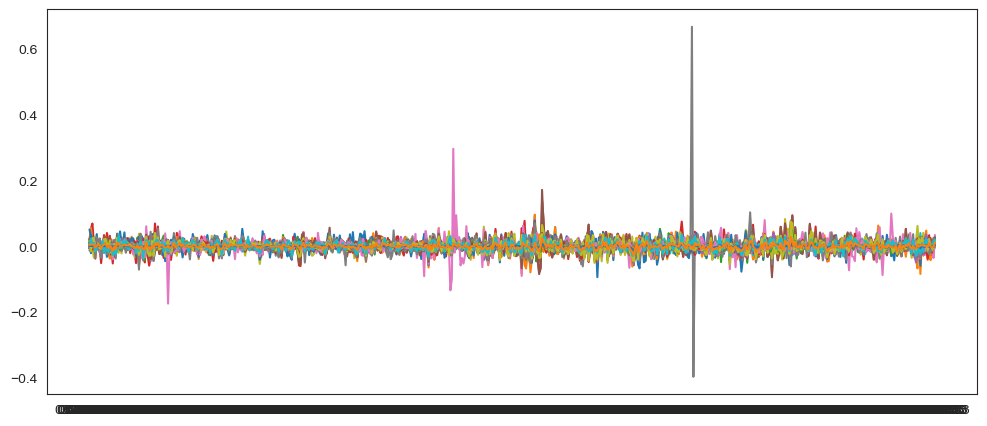

In [28]:
# vizualisation of ETF_mysteryR 
plt.figure(figsize=(12,5))
plt.plot(ETF_mystery)
plt.show()

# Lineare Regression: Allocation mystery with ETF's

In [29]:
X=ETF_mystery.drop('Mystery_Allocation', axis=1)
y=ETF_mystery['Mystery_Allocation']
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Mystery_Allocation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.800e+15
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:17:17   Log-Likelihood:                 12002.
No. Observations:                 582   AIC:                        -2.380e+04
Df Residuals:                     480   BIC:                        -2.336e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.682e-12    1.6e-11     -0.480      0.6

In [30]:
# juste the ETF we need
new_ETF_mystery= ETF_mystery.iloc[:, [7, 25, 30, 35, 39, 42, 53, 63, 79, 93, 99, 101]]
new_ETF_mystery

ETF_8    ETF_26    ETF_31    ETF_36    ETF_40    ETF_43  \
date                                                                     
05/01/2021  0.017210  0.004409 -0.000260  0.007096  0.003067 -0.000985   
06/01/2021 -0.001568  0.012612 -0.001042  0.005665  0.006798 -0.001936   
07/01/2021  0.029686  0.000322 -0.000609  0.014951  0.010776 -0.000600   
08/01/2021  0.009075  0.009827 -0.000087  0.005561  0.007043  0.000635   
11/01/2021  0.005214 -0.010241 -0.000609 -0.006457 -0.007070 -0.002540   
...              ...       ...       ...       ...       ...       ...   
23/03/2023  0.025367 -0.004076  0.005321  0.003000  0.008952  0.009968   
24/03/2023 -0.014530  0.016335  0.004083  0.005447 -0.003146  0.005420   
27/03/2023 -0.008668  0.002862 -0.002661  0.001439  0.001375 -0.005873   
28/03/2023 -0.009848  0.004995 -0.002970 -0.001590  0.001241 -0.006128   
29/03/2023  0.025632  0.013104  0.000050  0.013908  0.011828 -0.000399   

              ETF_54    ETF_64    ETF_80    ETF_94   ETF_100  \
date                                                           
05/01/2021 -0.000318  0.003379  0.004743  0.010030  0.002024   
06/01/2021 -0.000336  0.017102  0.006105  0.011139  0.022907   
07/01/2021  0.000125 -0.009918  0.013793  0.010414  0.004147   
08/01/2021 -0.000603  0.008706  0.006542  0.003935  0.010153   
11/01/2021 -0.000431  0.006941 -0.005773 -0.015215 -0.014067   
...              ...       ...       ...       ...       ...   
23/03/2023  0.001428  0.033565  0.001289  0.000313  0.007821   
24/03/2023  0.000534 -0.005901  0.000576 -0.005521 -0.001208   
27/03/2023 -0.011667 -0.024160  0.003454  0.011326  0.006973   
28/03/2023 -0.002677  0.014135 -0.000439  0.006827  0.013531   
29/03/2023  0.001311  0.023749  0.013435  0.013006  0.020469   

            Mystery_Allocation  
date                            
05/01/2021            0.004111  
06/01/2021            0.005152  
07/01/2021            0.005739  
08/01/2021            0.004513  
11/01/2021           -0.003387  
...                        ...  
23/03/2023            0.009507  
24/03/2023           -0.000120  
27/03/2023           -0.003780  
28/03/2023            0.000186  
29/03/2023            0.010604  

[582 rows x 12 columns]

In [31]:
# Regression with ETF we want to keep
X=new_ETF_mystery.drop('Mystery_Allocation', axis=1)
y=new_ETF_mystery['Mystery_Allocation']
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Mystery_Allocation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.753e+16
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:17:30   Log-Likelihood:                 11972.
No. Observations:                 582   AIC:                        -2.392e+04
Df Residuals:                     570   BIC:                        -2.387e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.732e-13   1.19e-11      0.023      0.9

# study a relation between ETF and maro_factors

In [99]:
# merge our data: ETF_universe and macro_factors
ETF_macros = pd.merge(ETF_universeR, macro_factorsR, on='date', how='inner')
ETF_macros

ETF_1     ETF_2     ETF_3     ETF_4     ETF_5     ETF_6  \
date                                                                     
06/01/2021 -0.021007 -0.005644 -0.008946  0.053786 -0.003423 -0.004339   
07/01/2021  0.012036 -0.008389  0.013753  0.069150  0.015391  0.011871   
08/01/2021  0.020835  0.026744 -0.004536  0.010413  0.020738  0.020800   
11/01/2021 -0.005786 -0.006955 -0.011561 -0.037496  0.000100 -0.004797   
12/01/2021  0.001487  0.006341  0.017341  0.011192  0.003360  0.004534   
...              ...       ...       ...       ...       ...       ...   
23/03/2023  0.024771  0.021792 -0.004029  0.010516 -0.004631  0.007812   
24/03/2023  0.004462 -0.022785 -0.019403 -0.010194 -0.000053  0.001387   
27/03/2023 -0.003329  0.002461  0.018850  0.002388  0.000860 -0.005089   
28/03/2023 -0.009438 -0.013393  0.003181  0.000057  0.000948  0.007359   
29/03/2023  0.013144  0.026700  0.001474  0.018999  0.010730 -0.001169   

               ETF_7     ETF_8     ETF_9    ETF_10  ...  Japan Nikkei 225  \
date                                                ...                     
06/01/2021  0.017570 -0.001568 -0.000085  0.000963  ...         -0.003781   
07/01/2021  0.021470  0.029686 -0.004040  0.001169  ...          0.016048   
08/01/2021  0.003015  0.009075 -0.034430  0.002344  ...          0.023605   
11/01/2021 -0.013355  0.005214 -0.027116 -0.002339  ...          0.000000   
12/01/2021 -0.000680  0.006038  0.003118 -0.002434  ...          0.000900   
...              ...       ...       ...       ...  ...               ...   
23/03/2023 -0.000658  0.025367  0.024058  0.010507  ...         -0.001699   
24/03/2023 -0.003922 -0.014530  0.007302  0.000854  ...         -0.001253   
27/03/2023  0.000116 -0.008668 -0.000457 -0.004410  ...          0.003349   
28/03/2023  0.002137 -0.009848  0.018199 -0.003632  ...          0.001506   
29/03/2023  0.008779  0.025632 -0.002446  0.001595  ...          0.013241   

            MSCI EM USD     US HY     EU HY  BCOM Energy  \
date                                                       
06/01/2021    -0.003519  0.001051  0.000607     0.009504   
07/01/2021     0.005334  0.000776  0.000851     0.003104   
08/01/2021     0.023635  0.000520  0.000869     0.013078   
11/01/2021    -0.002905 -0.001332  0.000239     0.004023   
12/01/2021     0.002946 -0.001242 -0.000777     0.012991   
...                 ...       ...       ...          ...   
23/03/2023     0.016937 -0.001448  0.000662    -0.009353   
24/03/2023    -0.005458 -0.004300 -0.001710    -0.001315   
27/03/2023    -0.008212  0.000819  0.001154     0.019048   
28/03/2023     0.006998 -0.001679  0.001194    -0.000360   
29/03/2023     0.009959  0.006084  0.001968    -0.004939   

            BCOM Industrial Metals  BCOM Gold  Dollar Index  US 10Y Bond  \
date                                                                       
06/01/2021                0.005005  -0.023434     -0.003444    -0.006406   
07/01/2021                0.009851   0.002620      0.003782    -0.002500   
08/01/2021               -0.013174  -0.040866     -0.000186    -0.002969   
11/01/2021               -0.022291   0.008365      0.009673    -0.002344   
12/01/2021                0.012157  -0.003584     -0.001435    -0.000312   
...                            ...        ...           ...          ...   
23/03/2023                0.014685   0.023747     -0.008925     0.008906   
24/03/2023                0.002336  -0.005762      0.009006     0.001250   
27/03/2023                0.007030  -0.015087     -0.001103    -0.011250   
28/03/2023                0.006538   0.009587     -0.004127    -0.003438   
29/03/2023               -0.000944  -0.002964      0.001767    -0.001093   

            Germany Bund 10Y  
date                          
06/01/2021         -0.007150  
07/01/2021          0.001825  
08/01/2021         -0.000075  
11/01/2021         -0.002650  
12/01/2021         -0.006050  
...                      ...  
23/03/2023          0.010900  
2

## Correlation between ETF and INDICES

In [100]:
ETF_macros_corr = pd.DataFrame(ETF_macros)
corr = ETF_macros.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [101]:
high_corr = corr.where(corr > 0.8)
high_corr.style.background_gradient(cmap='coolwarm')

In [102]:
ETF_macros6=ETF_macros.drop(columns=['EU HY','BCOM Energy','BCOM Industrial Metals','BCOM Gold','Dollar Index','Germany Bund 10Y'])

In [103]:
ETF_universe1=ETF_macros6.drop(columns=['US S&P 500','EU Stoxx 600','Japan Nikkei 225','MSCI EM USD','US HY','US 10Y Bond',])

In [104]:
 ETF_universe1_trans=ETF_universe1.transpose()

In [105]:
pca = PCA(n_components=4)
pca.fit( ETF_universe1)

PCA(n_components=4)

In [106]:
ETF_universe_trans = pca.transform( ETF_universe1)

In [107]:
#  tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées.
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0      Dim1            0.005913                  43.0                   43.0
1      Dim2            0.001392                  10.0                   53.0
2      Dim3            0.001127                   8.0                   61.0
3      Dim4            0.000986                   7.0                   68.0

In [108]:
# Transformation en DataFrame pandas
WGI_pca_df = pd.DataFrame({
    "Dim1" : ETF_universe_trans[:,0], 
    "Dim2" : ETF_universe_trans[:,1],
    "US S&P 500" : ETF_macros6["US S&P 500"],
    "EU Stoxx 600" : ETF_macros6["EU Stoxx 600"],
    "Japan Nikkei 225" : ETF_macros6["Japan Nikkei 225"],
    "MSCI EM USD" : ETF_macros6["MSCI EM USD"],
    "US HY" : ETF_macros6["US HY"],
    "US 10Y Bond" : ETF_macros6["US 10Y Bond"],
})

# Résultat (premières lignes)
WGI_pca_df.head()

Dim1      Dim2  US S&P 500  EU Stoxx 600  Japan Nikkei 225  \
date                                                                         
06/01/2021  0.058989 -0.014999    0.005721      0.013666         -0.003781   
07/01/2021  0.092143 -0.011944    0.015000      0.005134          0.016048   
08/01/2021  0.072125  0.038389    0.005582      0.006573          0.023605   
11/01/2021 -0.062532  0.003650   -0.006557     -0.006729          0.000000   
12/01/2021  0.028369  0.016691    0.000418      0.000578          0.000900   

            MSCI EM USD     US HY  US 10Y Bond  
date                                            
06/01/2021    -0.003519  0.001051    -0.006406  
07/01/2021     0.005334  0.000776    -0.002500  
08/01/2021     0.023635  0.000520    -0.002969  
11/01/2021    -0.002905 -0.001332    -0.002344  
12/01/2021     0.002946 -0.001242    -0.000312

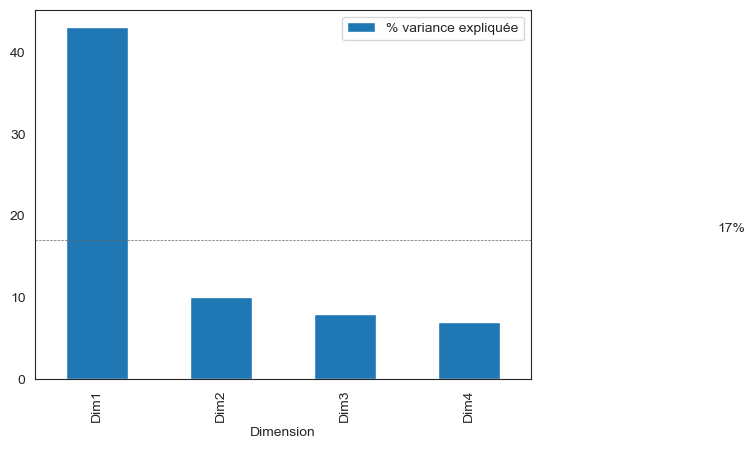

In [109]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "17%") # ajout de texte
plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

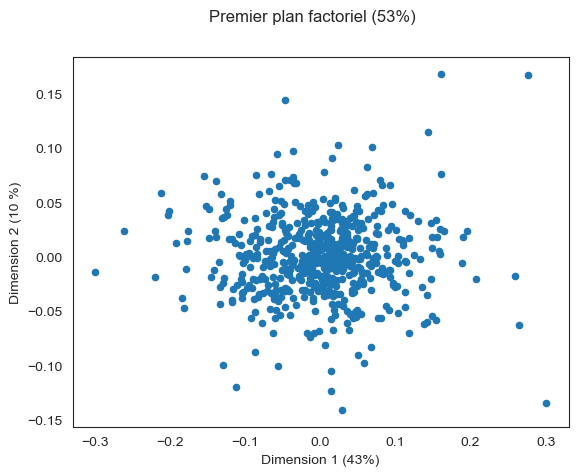

In [110]:
WGI_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (43%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (10 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (53%)") # titre général
plt.show()

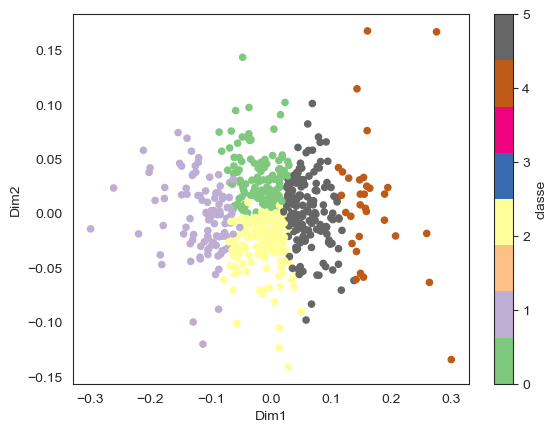

In [111]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6)
kmeans.fit(ETF_universe1)

pd.Series(kmeans.labels_).value_counts()


WGI_pca_k2 = WGI_pca_df.assign(classe = kmeans.labels_)
WGI_pca_k2.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.show()

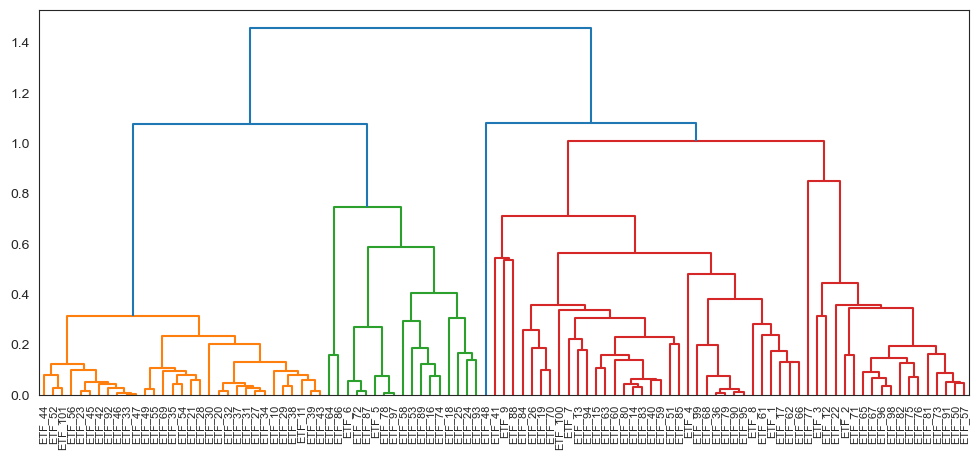

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12,5))
# Data set
df = ETF_universe1.transpose()
#df = df.set_index('date')
 
# Calculate the distance between each sample
Z = linkage(df,'ward')
 
# Plot with Custom leaves
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=list(df.index))

# Show the graph
plt.show()